### **Nombre:** Andrés Felipe Riaño Quintanilla.
### **Cédula:** 1083928808.

# **Tarea 11.1**

### **Librerías:**

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_moons,make_circles,make_blobs,make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics

### **Funciones:**

In [2]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### **Solución:**

<div style="text-align: justify;">  

**1.** Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.

</div>

Text(0.5, 1.0, 'make_blobs')

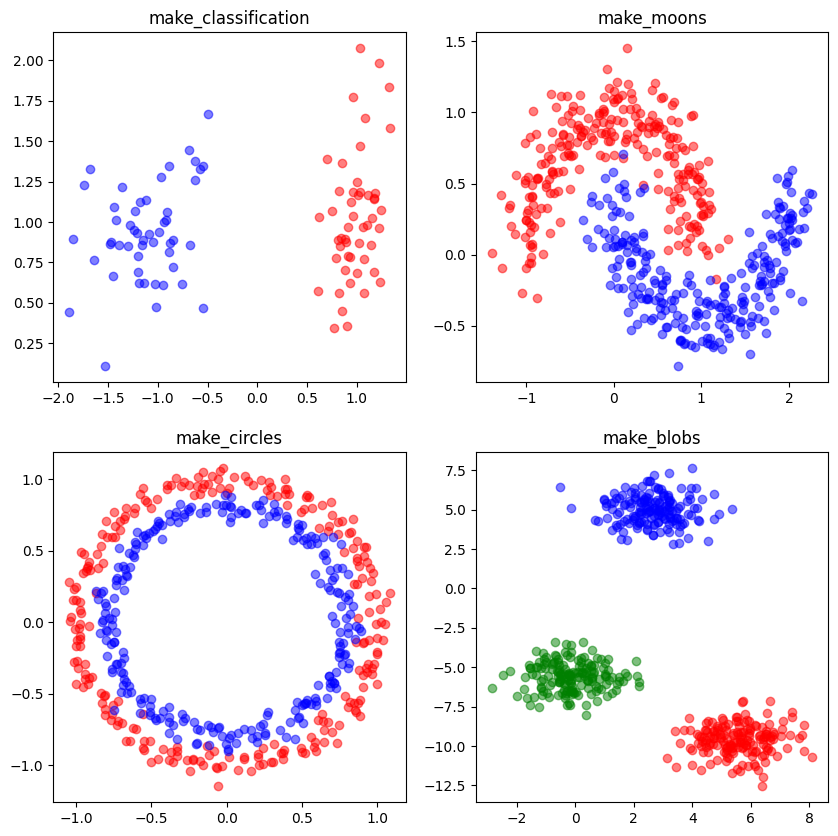

In [3]:
#Carga de los datasets y visualización de los mismos.

X0, y0 = make_classification(  
    n_features=2, n_redundant=0, n_informative=2, random_state=1, 
    n_clusters_per_class=1
)
X1, y1 = make_moons(n_samples=500, noise=0.15, shuffle=True,  random_state=1)
X2, y2 = make_circles(n_samples=500, noise=0.05, shuffle=True,  random_state=1)
X3, y3 = make_blobs(n_samples=500, centers=3, n_features=2,shuffle=True, 
                    random_state=10)

fig, axs = plt.subplots(2,2, figsize = (10,10))

axs[0, 0].plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
axs[0, 0].plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)
axs[0, 0].set_title('make_classification')

# Dataset a moons
axs[0, 1].plot(X1[:,0][y1==0],X1[:,1][y1==0],"ro", alpha=0.5)
axs[0, 1].plot(X1[:,0][y1==1],X1[:,1][y1==1],"bo", alpha=0.5)
axs[0, 1].set_title('make_moons')

# Dataset circles
axs[1, 0].plot(X2[:,0][y2==0],X2[:,1][y2==0],"ro", alpha=0.5)
axs[1, 0].plot(X2[:,0][y2==1],X2[:,1][y2==1],"bo", alpha=0.5)
axs[1, 0].set_title('make_circles')

# Dataset blobs
axs[1, 1].plot(X3[:,0][y3==0],X3[:,1][y3==0],"ro", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==1],X3[:,1][y3==1],"bo", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==2],X3[:,1][y3==2],"go", alpha=0.5)
axs[1, 1].set_title('make_blobs')

Clasificación make_moons:

In [4]:
parameters = {'kernel':('rbf','poly'), 'C':[0.01, 0.1, 1, 10, 100, 1000],"degree":[2, 3, 4],"gamma":["scale", "auto", 0.001, 0.01]}

clf1 = GridSearchCV(estimator=SVC(),
             param_grid = parameters)

clf1.fit(X1, y1)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ('rbf', 'poly')})

In [5]:
#Mejores parámetros:

clf1.best_params_ 

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [6]:
#Score:

clf1.best_score_

0.99

Clasificación make_circles:

In [7]:
clf2 = GridSearchCV(estimator=SVC(),
             param_grid = parameters)

clf2.fit(X2, y2)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ('rbf', 'poly')})

In [8]:
#Mejores parámetros:

clf2.best_params_ 

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [9]:
#Score:

clf2.best_score_

0.974

Clasificación make_blobs:

In [10]:
parameters2 = {'kernel':('rbf','poly','linear'), 'C':[0.1, 1, 10]}

clf3 = GridSearchCV(estimator=SVC(),
             param_grid = parameters2)

clf3.fit(X3, y3)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ('rbf', 'poly', 'linear')})

In [11]:
#Mejores parámetros:

clf3.best_params_ 

{'C': 0.1, 'kernel': 'rbf'}

In [12]:
#Score:

clf3.best_score_

1.0

<div style="text-align: justify;">  

**2.** Con los mejores párametros dibujar  las fronteras de clasificación.

</div>

Frontera make_moons:

Training error:0.994


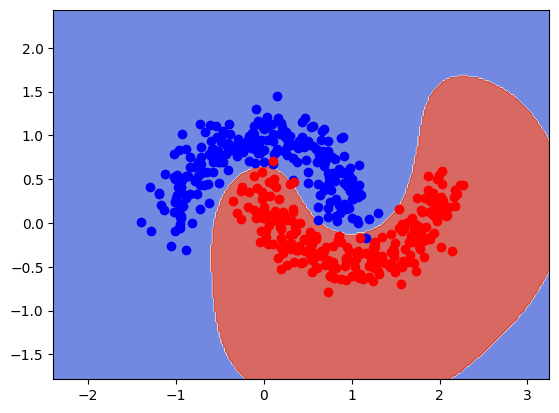

In [13]:
fig, ax = plt.subplots()
x0, x1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(x0, x1)
plot_contours(ax, clf1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X1[y1==0][:,0],X1[y1==0][:,1],"bo", alpha=1)
plt.plot(X1[y1==1][:,0],X1[y1==1][:,1],"ro", alpha=1)
print(f"Training error:{clf1.score(X1, y1):.3f}")

Frontera make_circles:

Training error:0.972


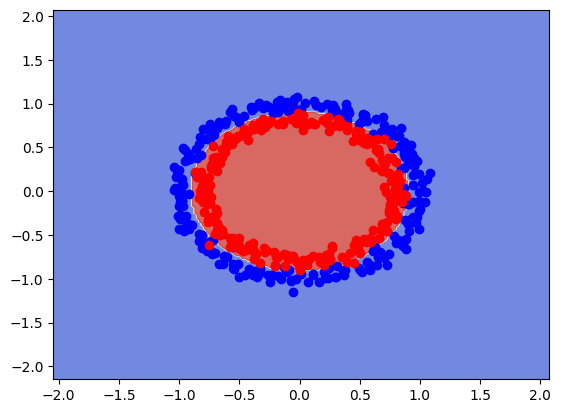

In [14]:
fig, ax = plt.subplots()
x0, x1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(x0, x1)
plot_contours(ax, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X2[y2==0][:,0],X2[y2==0][:,1],"bo", alpha=1)
plt.plot(X2[y2==1][:,0],X2[y2==1][:,1],"ro", alpha=1)
print(f"Training error:{clf2.score(X2, y2):.3f}")

Frontera make_blobs:

Training error:1.000


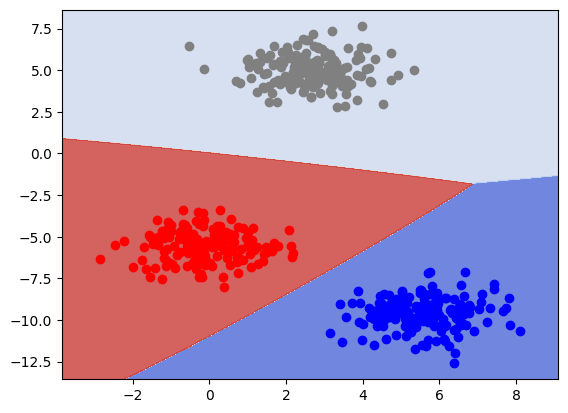

In [15]:
fig, ax = plt.subplots()
x0, x1 = X3[:, 0], X3[:, 1]
xx, yy = make_meshgrid(x0, x1)
plot_contours(ax, clf3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X3[y3==0][:,0],X3[y3==0][:,1],"bo", alpha=1)
plt.plot(X3[y3==1][:,0],X3[y3==1][:,1],"o", color='gray', alpha=1)
plt.plot(X3[y3==2][:,0],X3[y3==2][:,1],"ro", alpha=1)
print(f"Training error:{clf3.score(X3, y3):.3f}")

<div style="text-align: justify;">  

**3.** Con los mejores parámetros dibujar la matriz de confusion.

</div>

Matriz de confusión make_moons:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        60

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



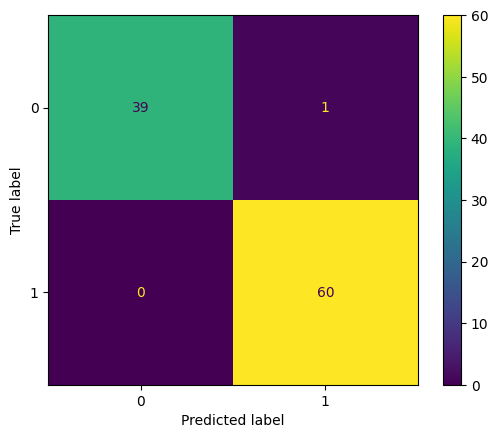

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1080)
scaler1 = StandardScaler()
scaler1.fit(X1_train)

X1_train_scaled = scaler1.transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Model 
model1 = SVC(kernel='rbf', C=10, gamma = 'scale',degree = 2)
model1.fit(X1_train_scaled,y1_train)
# Confusion matrix
y1_predict = model1.predict(X1_test_scaled)
print(metrics.classification_report(y1_test, y1_predict))
cm = metrics.confusion_matrix(y1_test, y1_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Matriz de confusión make_circles:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        60

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



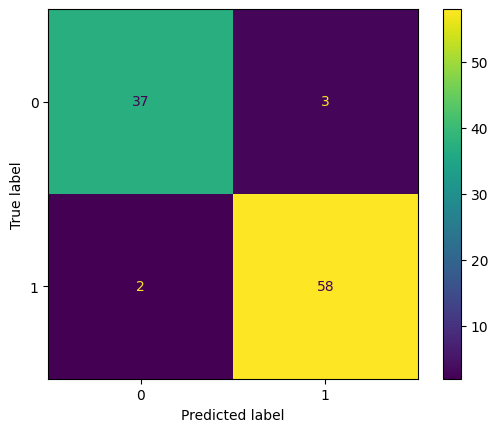

In [17]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1080)
scaler2 = StandardScaler()
scaler2.fit(X2_train)

X2_train_scaled = scaler2.transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Model 
model2 = SVC(kernel='poly', C=1, gamma = 'scale',degree = 2)
model2.fit(X2_train_scaled,y2_train)
# Confusion matrix
y2_predict = model2.predict(X2_test_scaled)
print(metrics.classification_report(y2_test, y2_predict))
cm = metrics.confusion_matrix(y2_test, y2_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Matriz de confusión make_blobs:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



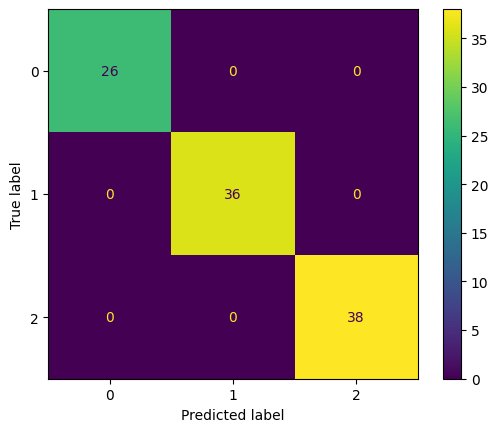

In [18]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=1080)
scaler3 = StandardScaler()
scaler3.fit(X3_train)

X3_train_scaled = scaler3.transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

# Model 
model3 = SVC(kernel='rbf', C=0.1)
model3.fit(X3_train_scaled,y3_train)
# Confusion matrix
y3_predict = model3.predict(X3_test_scaled)
print(metrics.classification_report(y3_test, y3_predict))
cm = metrics.confusion_matrix(y3_test, y3_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()